In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import utils.functions as f

import warnings

warnings.filterwarnings("ignore", message="divide by zero encountered in scalar divide")

c:\Users\Lorenzo\miniconda3\lib\site-packages\torch\_functorch\deprecated.py:61: UserWarning: We've integrated functorch into PyTorch. As the final step of the integration, functorch.vmap is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use torch.vmap instead; see the PyTorch 2.0 release notes and/or the torch.func migration guide for more details https://pytorch.org/docs/master/func.migrating.html
  warn_deprecated('vmap', 'torch.vmap')


In [3]:
dataset = "reverse_matching_20240213"  # "direct_matching_20240213" or "reverse_matching_20240213"
df_processed = pd.read_csv(f"Data/{dataset}_processed.csv", sep=";")

### Correlation Matrix

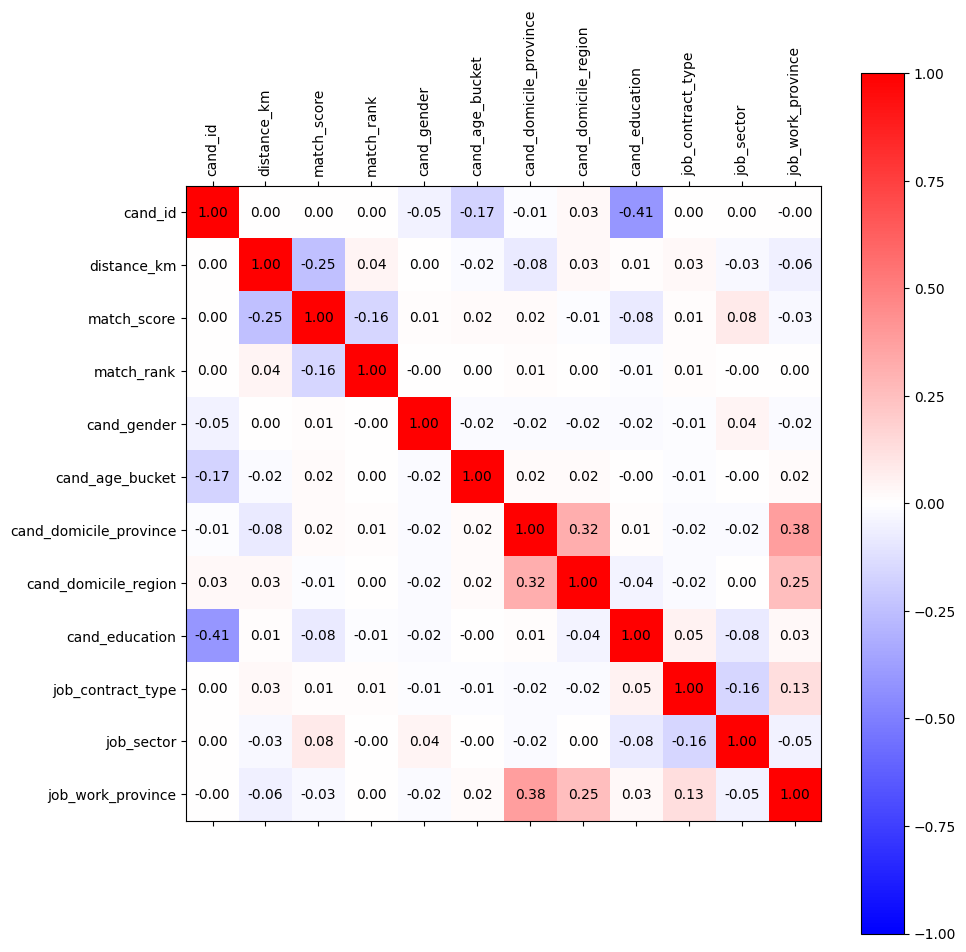

In [4]:
selected_columns = [
    "cand_id",
    "distance_km",
    "match_score",
    "match_rank",
    "cand_gender",
    "cand_age_bucket",
    "cand_domicile_province",
    "cand_domicile_region",
    "cand_education",
    "job_contract_type",
    "job_sector",
    "job_work_province",
]
f.plot_correlation_matrix(df_processed, selected_columns)

# Bias Detection

## Gender Bias
Enconding:
- "Female": 0
- "Male": 1

In [5]:
f.show_bias(df_processed, "cand_gender", 1)

Disparate_Impact                                               \
                  count      mean       std  min       25%       50%   
Sector                                                                 
0.0              1756.0  0.866004  1.538106  0.0  0.000000  0.329612   
1.0                44.0  1.056001  1.032137  0.0  0.438650  0.676892   
2.0               527.0  1.444998  1.325985  0.0  0.611940  1.087894   
3.0              1055.0  1.283277  1.258333  0.0  0.644264  0.942534   
4.0              1062.0  1.255619  1.101445  0.0  0.667231  0.953187   
5.0               133.0  0.614771  1.675944  0.0  0.000000  0.000000   
6.0                74.0  1.062525  1.019745  0.0  0.319742  0.876712   
7.0              1392.0  1.267675  1.214873  0.0  0.470481  0.940961   
8.0              2016.0  0.848797  1.328257  0.0  0.000000  0.421237   
9.0              1106.0  1.356216  1.336641  0.0  0.528228  0.995354   
10.0              153.0  1.119117  0.872852  0.0  0.580126  0.914138   
11.0             2441.0  1.351471  2.352094  0.0  0.000000  0.725644   
12.0             1595.0  0.643818  1.167799  0.0  0.000000  0.000000   
13.0              757.0  1.226283  1.232262  0.0  0.513474  0.871350   
14.0              274.0  0.929971  0.949888  0.0  0.173302  0.727869   
15.0               56.0  1.115009  1.150743  0.0  0.450605  0.902218   
16.0               44.0  0.766709  1.025913  0.0  0.000000  0.347222   

                            Statistical_Parity_Difference            ...  \
             75%        max                         count      mean  ...   
Sector                                                               ...   
0.0     1.318450  18.462636                        1756.0 -0.000326  ...   
1.0     1.350716   5.736196                          44.0 -0.000986  ...   
2.0     1.835821   9.247098                         527.0  0.000443  ...   
3.0     1.610659   9.667892                        1055.0  0.000228  ...   
4.0     1.668077   9.344193                        1062.0  0.000127  ...   
5.0     0.362162  13.037838                         133.0 -0.002806  ...   
6.0     1.753425   4.383562                          74.0 -0.000626  ...   
7.0     1.568650  10.193745                        1392.0  0.000171  ...   
8.0     1.203534  18.538578                        2016.0 -0.000430  ...   
9.0     1.876952  11.261715                        1106.0  0.000269  ...   
10.0    1.353628   4.644795                         153.0  0.000500  ...   
11.0    1.451613  29.025741                        2441.0  0.000023  ...   
12.0    0.867102  15.035078                        1595.0 -0.000384  ...   
13.0    1.494312  10.456200                         757.0  0.000075  ...   
14.0    1.214376   6.065574                         274.0 -0.000987  ...   
15.0    1.456956   7.209677                          56.0  0.002331  ...   
16.0    1.118421   4.230769                          44.0 -0.000670  ...   

                              DIDI                                    \
             75%       max   count      mean       std           min   
Sector                                                                 
0.0     0.000075  0.017957  1756.0  0.000467  0.000641  4.529412e-06   
1.0     0.005194  0.077078    44.0  0.008850  0.011256  4.440004e-05   
2.0     0.002154  0.027257   527.0  0.001431  0.001763  4.454839e-05   
3.0     0.000643  0.030800  1055.0  0.000683  0.001264  4.879826e-06   
4.0     0.000741  0.012707  1062.0  0.000645  0.000886  3.218452e-07   
5.0    -0.001658  0.245646   133.0  0.002487  0.005422  1.010178e-04   
6.0     0.002290  0.054271    74.0  0.004042  0.005314  1.123567e-04   
7.0     0.000520  0.023567  1392.0  0.000488  0.000797  3.015190e-06   
8.0     0.000154  0.032173  2016.0  0.000393  0.000608  4.584829e-06   
9.0     0.000639  0.019446  1106.0  0.000627  0.001010  4.124591e-07   
10.0    0.001339  0.058883   153.0  0.001867  0.003318  1.770021e-05   
11.0    0.000304  0.023740  2441.0  0

## Location Bias

In [5]:
f.show_bias(df_processed, "same_location", 1)

Disparate_Impact                                                    \
                  count      mean       std       min       25%       50%   
Sector                                                                      
0.0              1756.0  1.654863  3.001332  0.000000  0.336587  0.813620   
1.0                44.0  3.154733  6.485891  0.000000  0.660417  0.981065   
2.0               527.0  1.760547  3.211077  0.000000  0.368750  0.749059   
3.0              1055.0  2.287455  8.077301  0.000000  0.389142  0.693036   
4.0              1062.0  2.598226  7.213123  0.000000  0.280431  0.666936   
5.0               133.0  1.443046  1.998091  0.000000  0.416517  0.829443   
6.0                74.0  1.713167  3.318499  0.000000  0.483924  0.546366   
7.0              1392.0  1.724854  8.642365  0.000000  0.250667  0.546912   
8.0              2016.0  1.231090  2.440205  0.000000  0.258300  0.560783   
9.0              1106.0  2.058160  6.180309  0.000000  0.332943  0.661070   
10.0              153.0  2.162197  4.033063  0.000000  0.383178  0.834687   
11.0             2441.0  1.252703  2.783174  0.000000  0.159304  0.641361   
12.0             1595.0  1.381814  3.535470  0.000000  0.184603  0.549270   
13.0              757.0  2.006782  6.453741  0.000000  0.297870  0.793214   
14.0              274.0  2.449780  5.064407  0.000000  0.398065  0.760157   
15.0               56.0  2.209077  5.701769  0.000000  0.279875  0.716364   
16.0               44.0  0.023195  0.041131  0.001715  0.003431  0.006861   

                             Statistical_Parity_Difference            ...  \
             75%         max                         count      mean  ...   
Sector                                                                ...   
0.0     1.557672   34.341078                        1756.0 -0.000060  ...   
1.0     2.011257   33.920000                          44.0  0.001947  ...   
2.0     1.843750   30.546826                         527.0 -0.000452  ...   
3.0     1.561544  135.131742                        1055.0 -0.000250  ...   
4.0     1.829057  117.388601                        1062.0 -0.000350  ...   
5.0     1.676259   11.095841                         133.0 -0.000588  ...   
6.0     1.593366   17.381727                          74.0 -0.000624  ...   
7.0     1.585139  267.383298                        1392.0 -0.000366  ...   
8.0     1.367385   44.166447                        2016.0 -0.000257  ...   
9.0     1.419715   95.748146                        1106.0 -0.000308  ...   
10.0    1.704275   24.994141                         153.0 -0.001736  ...   
11.0    1.287743   75.262530                        2441.0 -0.000170  ...   
12.0    1.393339   82.112993                        1595.0 -0.000194  ...   
13.0    1.780545  113.917117                         757.0  0.000146  ...   
14.0    2.125191   55.115617                         274.0 -0.001663  ...   
15.0    2.145000   41.009042                          56.0 -0.006308  ...   
16.0    0.019297    0.221269                          44.0 -0.976805  ...   

                              DIDI                                    \
             75%       max   count      mean       std           min   
Sector                                                                 
0.0     0.000413  0.013645  1756.0  0.000808  0.001465  5.366913e-08   
1.0     0.007086  0.102875    44.0  0.009567  0.014727  1.120185e-05   
2.0     0.001458  0.049245   527.0  0.003304  0.005351  1.448380e-05   
3.0     0.000284  0.064673  1055.0  0.001415  0.003934  9.884051e-06   
4.0     0.000703  0.046969  1062.0  0.001638  0.003029  6.354622e-06   
5.0     0.004145  0.042779   133.0  0.006096  0.009377  2.214062e-04   
6.0     0.002716  0.075492    74.0  0.008133  0.013284  1.322677e-04   
7.0     0.000358  0.081066  1392.0  0.001106  0.002965  2.868475e-06   
8.0     0.000266  0.033902  2016.0  0.000822  0.001461  2.829504e-06   
9.0     0.000402  0.029498  1106.0  0.001204  0.002634  8.743

## Age Bias
Enconding:
- "15-24": 0
- "25-34": 1
- "35-44": 2
- "45-54": 3
- "55-74": 4

In [5]:
f.show_bias(df_processed, "cand_age_bucket", 1)

Disparate_Impact                                               \
                  count      mean       std  min       25%       50%   
Sector                                                                 
0.0              1756.0  1.021618  0.914866  0.0  0.526246  0.650408   
1.0                44.0  1.360533  1.387246  0.0  0.564885  1.125954   
2.0               527.0  1.002208  1.086497  0.0  0.410224  0.820449   
3.0              1055.0  1.137601  1.014588  0.0  0.527934  0.980448   
4.0              1062.0  1.120937  0.891413  0.0  0.610998  0.916496   
5.0               133.0  1.059673  0.860117  0.0  0.651992  0.654088   
6.0                74.0  0.948462  0.958161  0.0  0.548547  0.709510   
7.0              1392.0  1.017570  0.851495  0.0  0.578805  0.826400   
8.0              2016.0  1.133092  0.927259  0.0  0.551573  0.950948   
9.0              1106.0  1.032951  0.852640  0.0  0.578223  0.867334   
10.0              153.0  1.015136  0.694327  0.0  0.624771  0.816028   
11.0             2441.0  1.116589  0.997591  0.0  0.550495  0.880791   
12.0             1595.0  1.062925  0.992145  0.0  0.567168  0.756224   
13.0              757.0  1.031111  0.869774  0.0  0.628314  0.807832   
14.0              274.0  1.141131  0.926493  0.0  0.565130  0.790010   
15.0               56.0  1.218329  1.027261  0.0  0.634315  0.893328   
16.0               44.0  0.902723  0.612519  0.0  0.563003  0.864611   

                            Statistical_Parity_Difference            ...  \
             75%        max                         count      mean  ...   
Sector                                                               ...   
0.0     1.300817   7.802251                        1756.0 -0.000154  ...   
1.0     1.396331   7.318702                          44.0 -0.001439  ...   
2.0     1.230673  12.306733                         527.0 -0.001067  ...   
3.0     1.583801  10.558673                        1055.0  0.000042  ...   
4.0     1.323828   7.331971                        1062.0 -0.000062  ...   
5.0     1.308176   4.563941                         133.0 -0.000605  ...   
6.0     1.174494   5.943152                          74.0 -0.000700  ...   
7.0     1.157948   6.945663                        1392.0 -0.000145  ...   
8.0     1.496535  11.027098                        2016.0  0.000035  ...   
9.0     1.289882  10.408010                        1106.0 -0.000045  ...   
10.0    1.428049   4.284146                         153.0 -0.001187  ...   
11.0    1.467986  11.009893                        2441.0  0.000009  ...   
12.0    1.417920   8.507523                        1595.0 -0.000080  ...   
13.0    1.257158   8.168081                         757.0 -0.000073  ...   
14.0    1.577982   7.100917                         274.0 -0.000597  ...   
15.0    1.533945   5.074523                          56.0 -0.000864  ...   
16.0    1.153485   2.815013                          44.0 -0.001422  ...   

                              DIDI                                    \
             75%       max   count      mean       std           min   
Sector                                                                 
0.0     0.000187  0.008086  1756.0  0.000390  0.000521  7.717716e-07   
1.0     0.006472  0.050576    44.0  0.006982  0.008658  1.283086e-04   
2.0     0.000649  0.013325   527.0  0.001407  0.001541  1.387906e-05   
3.0     0.000514  0.014760  1055.0  0.000561  0.000769  1.689646e-05   
4.0     0.000427  0.005649  1062.0  0.000495  0.000631  1.099493e-05   
5.0     0.001955  0.024166   133.0  0.003031  0.003683  8.569050e-05   
6.0     0.001039  0.023458    74.0  0.002665  0.003272  3.180510e-05   
7.0     0.000215  0.007761  1392.0  0.000412  0.000539  9.036779e-06   
8.0     0.000381  0.006196  2016.0  0.000382  0.000452  2.735783e-06   
9.0     0.000283  0.008032  1106.0  0.000440  0.000590  1.051354e-05   
10.0    0.000487  0.030630   153.0  0.001949  0.002844  1.822777e-06   
11.0    0.000282  0.008529  2441.0  0